In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# read data
raw_data = pd.read_csv("heart_attack/heart.csv")

In [3]:
# show head, info, null values, describe
raw_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
raw_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

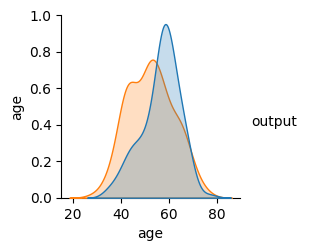

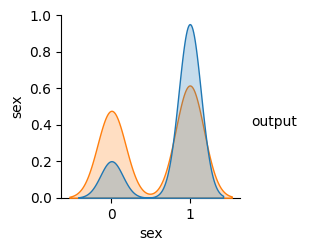

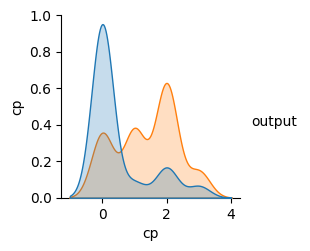

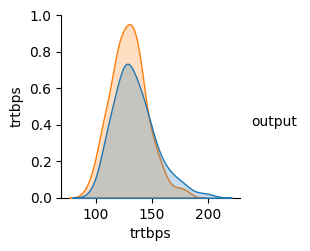

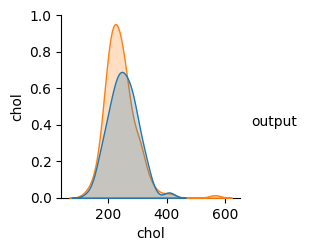

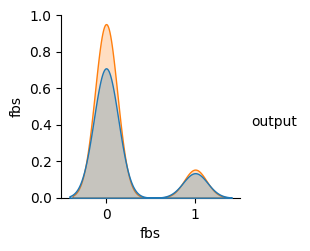

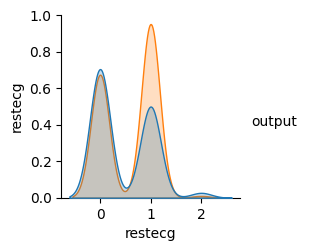

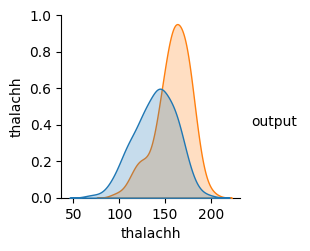

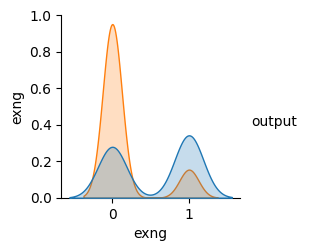

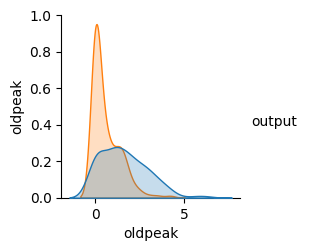

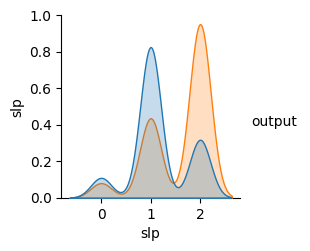

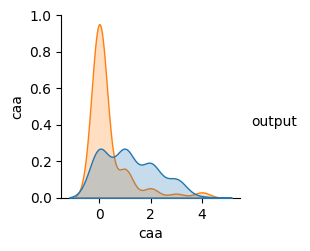

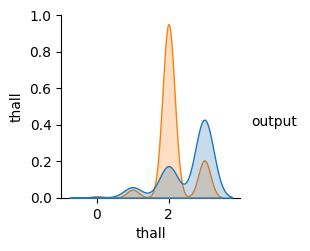

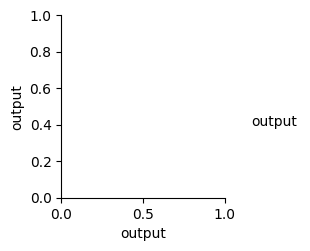

In [17]:
# pairplots
for i in raw_data.columns:
    sns.pairplot(data=raw_data, hue="output", vars=[i])
    plt.show()

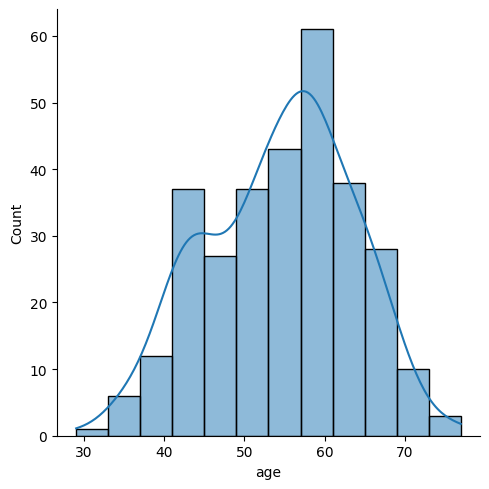

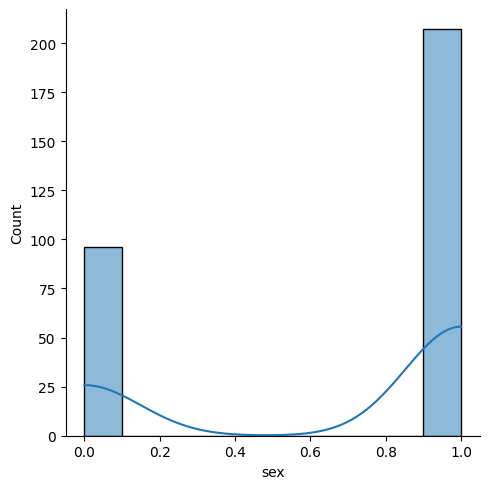

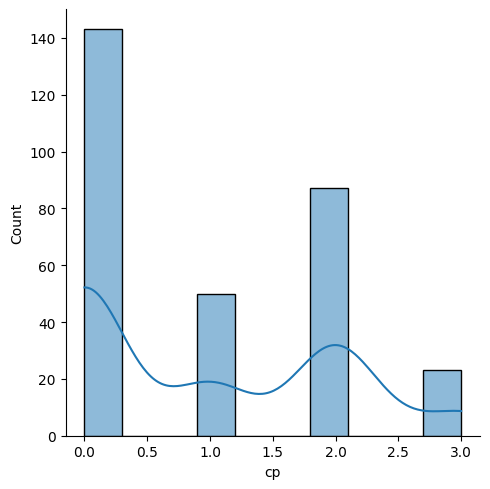

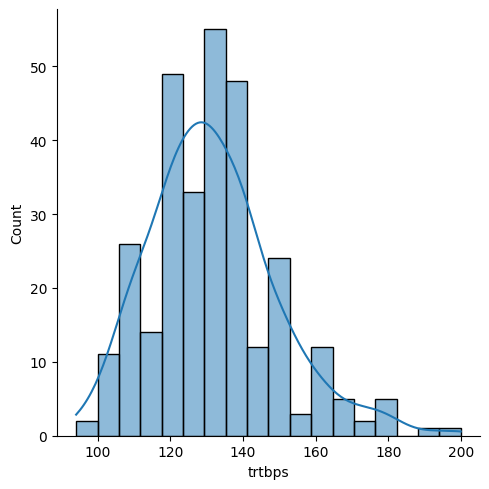

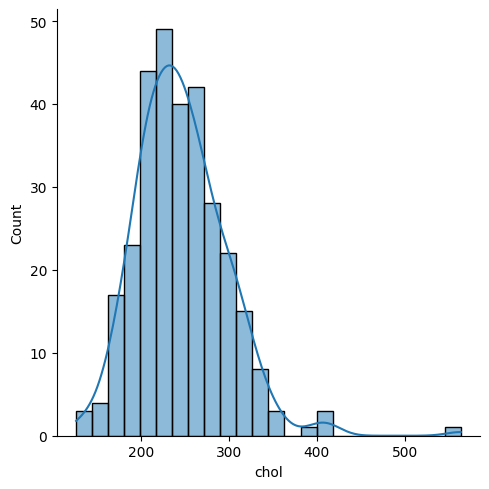

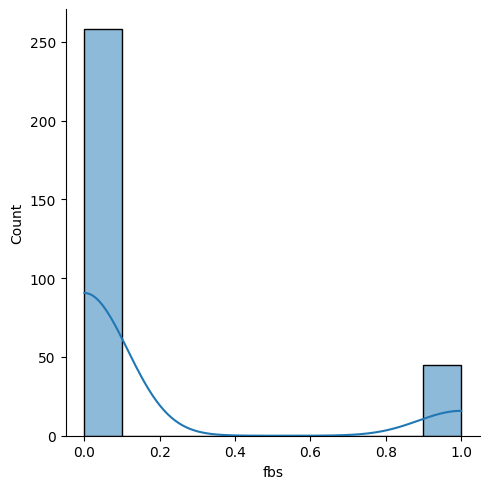

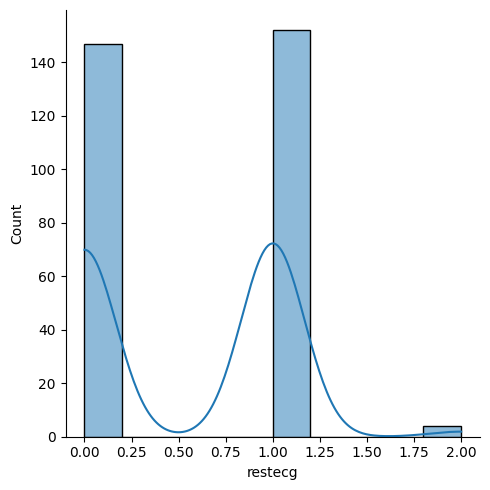

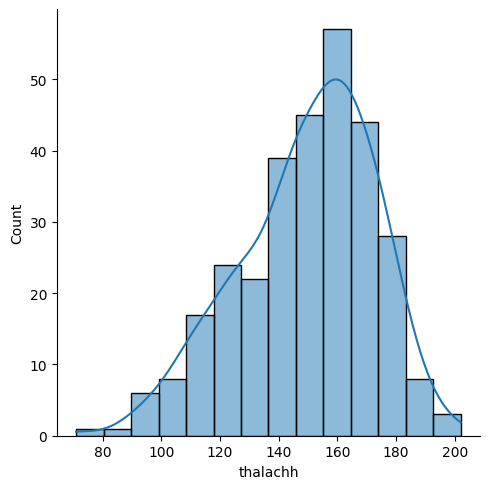

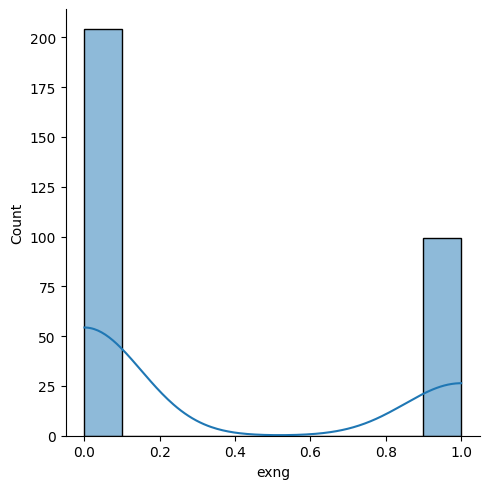

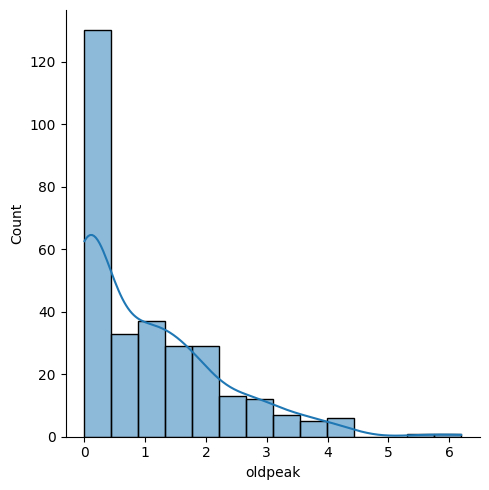

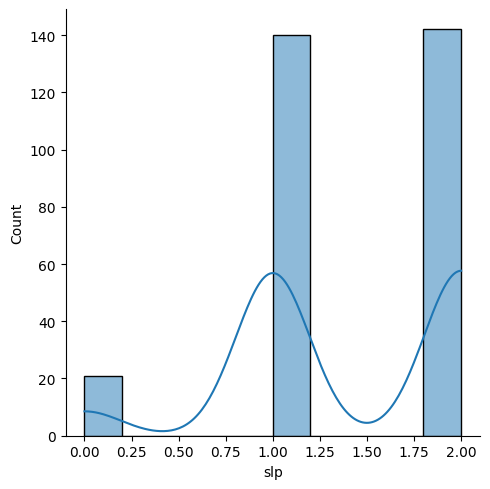

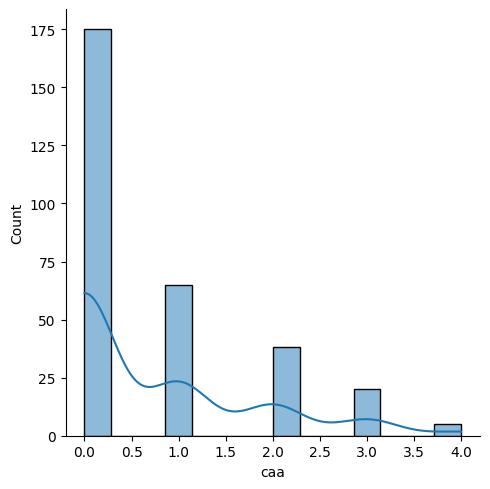

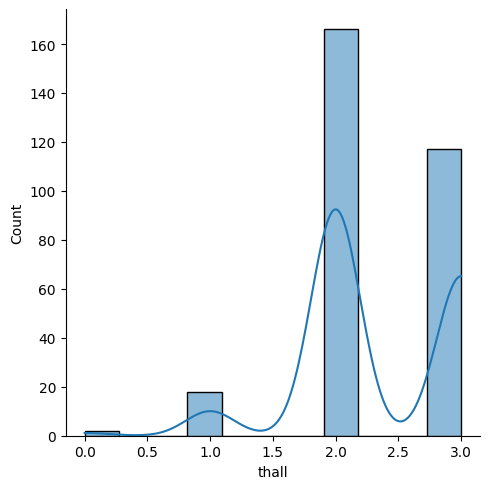

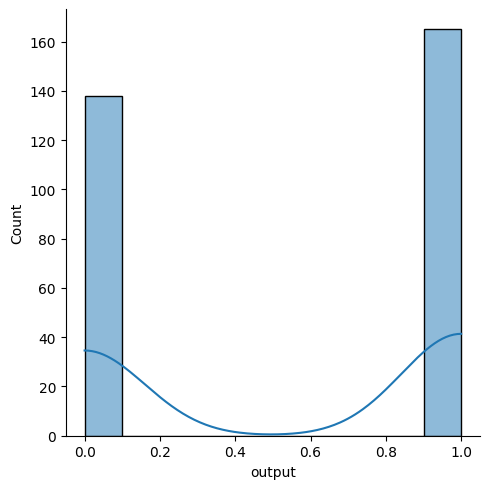

In [22]:
cols = raw_data.describe().columns
for col in cols:
    sns.displot(x=eval(f"raw_data.{col}"), kde=True)
    plt.show()

In [28]:
# scaling 
process_data = raw_data.copy()

In [29]:
process_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
scaler = MinMaxScaler()
scale_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak", "slp", "thall", "cp"]
process_data[scale_cols] = scaler.fit_transform(process_data[scale_cols])

In [31]:
process_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,1.000000,0.481132,0.244292,1,0,0.603053,0,0.370968,0.0,0,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0,1,0.885496,0,0.564516,0.0,0,0.666667,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0,0.770992,0,0.225806,1.0,0,0.666667,1
3,0.562500,1,0.333333,0.245283,0.251142,0,1,0.816794,0,0.129032,1.0,0,0.666667,1
4,0.583333,0,0.000000,0.245283,0.520548,0,1,0.702290,1,0.096774,1.0,0,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.000000,0.433962,0.262557,0,1,0.396947,1,0.032258,0.5,0,1.000000,0
299,0.333333,1,1.000000,0.150943,0.315068,0,1,0.465649,0,0.193548,0.5,0,1.000000,0
300,0.812500,1,0.000000,0.471698,0.152968,1,1,0.534351,0,0.548387,0.5,2,1.000000,0
301,0.583333,1,0.000000,0.339623,0.011416,0,1,0.335878,1,0.193548,0.5,1,1.000000,0


In [32]:
# input output split
y = process_data.pop("output")
X = process_data

In [33]:
# shape control
X.shape, y.shape

((303, 13), (303,))

In [34]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# sahep control
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [46]:
# using different ml algorithms
def standart_algo(algorithm):
    print(algorithm)
    algorithm_ = eval(f"{algorithm}")
    algorithm_.fit(X_train, y_train)
    y_prediction = algorithm_.predict(X_test)
    
    # report
    report = classification_report(y_test, y_prediction)
    roc_auc = roc_auc_score(y_test, y_prediction)
    
    print(f"classification report :\n{report}\n roc_auc_score :{roc_auc}")
    
    return roc_auc*100

SVC(C=10, gamma='auto', kernel='rbf')
classification report :
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

 roc_auc_score :0.8191721132897605
KNeighborsClassifier(n_neighbors=4)
classification report :
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

 roc_auc_score :0.8082788671023965
RandomForestClassifier(max_depth=5, max_features='sqrt', criterion='gini', random_state=0, n_estimators=50)
classification report :
              precisio

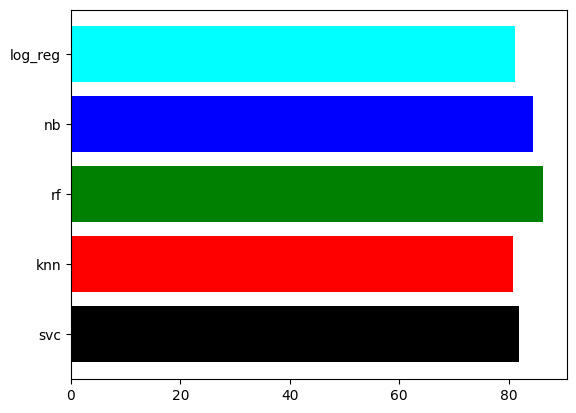

In [54]:
methods = ["SVC(C=10, gamma='auto', kernel='rbf')", "KNeighborsClassifier(n_neighbors=4)", 
           "RandomForestClassifier(max_depth=5, max_features='sqrt', criterion='gini', random_state=0, n_estimators=50)",
          "GaussianNB()", "LogisticRegression(solver='liblinear', random_state=0)"]

score_list = []
for i in methods:
    roc_aucs = standart_algo(i)
    score_list.append(roc_aucs)

# plotting
plt.barh(["svc", "knn","rf", "nb", "log_reg"], score_list, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()
    

In [69]:
# with grid search
def grid_searcher(algorithm, parameters):
    print(algorithm)
    grid_search_fun = GridSearchCV(estimator=eval(algorithm),
                                  param_grid=parameters,
                                  n_jobs=4,
                                  cv=5)
    grid_search_fun.fit(X_train, y_train)
    
    y_pred = grid_search_fun.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(report, roc_auc_score, grid_search_fun.best_params_)
    
    return roc_auc


SVC()


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\b

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61
 <function roc_auc_score at 0x00000204EEEB8AF0> {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 <function roc_auc_score at 0x00000204EEEB8AF0> {'n_neighbors': 5}
RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88   

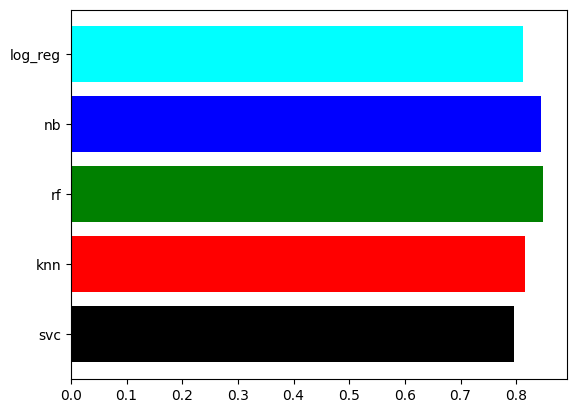

In [70]:
methods_2 = ["SVC()", "KNeighborsClassifier()", 
             "RandomForestClassifier()",
             "GaussianNB()", "LogisticRegression()"]
parameters_2 = [[{"C":[1, 10, 100, 1000],
                 "gamma":["sqrt", "log2", 0.1, 0.2],
                 "kernel": ["rbf", "linear", "poly"]}],
               [{"n_neighbors":[3, 4, 5, 6, 7]}],
               [{"max_depth": [10, 20, 30],
               "n_estimators":[100, 200, 300],
                "max_features":["sqrt", "log2"],
                "criterion":["gini", "entropy"],
                "random_state":[0]}],
                [{"var_smoothing":[1e-9, 2e-9, 3e-9]}],
               [{"solver":["liblinear"], "random_state":[0]}]]

rooc_scores = []
names = []
for i,j in zip(methods_2, parameters_2):
    score = grid_searcher(i, j)
    rooc_scores.append(score)
    
plt.barh(["svc", "knn","rf", "nb", "log_reg"], rooc_scores, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()
    